# PCA de importações de Santos

## Setup

### Importações

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [202]:
dict_dtypes = pd.read_pickle("datasets/aux_carga_dtypes.pkl").to_dict()

In [142]:
df = pd.read_csv("datasets/df_rus_ua_psantos.csv", decimal=",", dtype=dict_dtypes)

### Limpeza

In [86]:
df.columns

Index(['IDCarga', 'IDAtracacao', 'Origem', 'Destino', 'CDMercadoria',
       'Tipo Operação da Carga', 'Carga Geral Acondicionamento',
       'ConteinerEstado', 'Tipo Navegação', 'FlagAutorizacao', 'FlagCabotagem',
       'FlagCabotagemMovimentacao', 'FlagConteinerTamanho', 'FlagLongoCurso',
       'FlagMCOperacaoCarga', 'FlagOffshore', 'FlagTransporteViaInterioir',
       'Percurso Transporte em vias Interiores',
       'Percurso Transporte Interiores', 'STNaturezaCarga', 'STSH2', 'STSH4',
       'Natureza da Carga', 'Sentido', 'TEU', 'QTCarga', 'VLPesoCargaBruta',
       'Ano'],
      dtype='object')

In [87]:
df.drop(["IDAtracacao", "Destino", "Sentido"], axis=1, inplace=True)

### Junção de Carga com Carga Conteinerizada

In [88]:
pd1 = pd.DataFrame({"colA": ["A", "B", "C"], "colB": [3, 4, 5]})
pd2 = pd.DataFrame({"colA": ["A", "B", "A", "B"], "colC": [3, 1, 1, 4]})

In [89]:
pd1.merge(pd2, on="colA", how="outer")

,colA,colB,colC
0,A,3,3.0
1,A,3,1.0
2,B,4,1.0
3,B,4,4.0
4,C,5,NaN


In [90]:
df_cont = pd.read_csv("/home/vortex/Documents/Fatec/Trabalhos/Projeto Integrador local/BD/ANTAQ/2018Carga_Conteinerizada.csv", sep=";", decimal=",", dtype=dict_dtypes)

In [91]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651101 entries, 0 to 3651100
Data columns (total 3 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IDCarga                     int64  
 1   CDMercadoriaConteinerizada  object 
 2   VLPesoCargaConteinerizada   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 83.6+ MB


In [92]:
df = df.merge(df_cont, "left", "IDCarga")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   IDCarga                                 8093 non-null   int64   
 1   Origem                                  8093 non-null   object  
 2   CDMercadoria                            8093 non-null   object  
 3   Tipo Operação da Carga                  8093 non-null   category
 4   Carga Geral Acondicionamento            3878 non-null   category
 5   ConteinerEstado                         3833 non-null   object  
 6   Tipo Navegação                          8093 non-null   category
 7   FlagAutorizacao                         8093 non-null   category
 8   FlagCabotagem                           8093 non-null   boolean 
 9   FlagCabotagemMovimentacao               8093 non-null   boolean 
 10  FlagConteinerTamanho                    3833 non

In [102]:
df_mestre = df.copy()
for ano in range(df["Ano"].min(), df["Ano"].max() + 1):
    print("Ano atual: ", ano)
    df_cont = pd.read_csv(f"/home/vortex/Documents/Fatec/Trabalhos/Projeto Integrador local/BD/ANTAQ/{ano}Carga_Conteinerizada.csv", sep=";", decimal=",", dtype=dict_dtypes)

    df_mestre = df_mestre.merge(df_cont,"left", "IDCarga", suffixes=('', '_x'))
    
    df_mestre["CDMercadoriaConteinerizada"] = df_mestre["CDMercadoriaConteinerizada"].combine_first(df_mestre["CDMercadoriaConteinerizada_x"])
    df_mestre["VLPesoCargaConteinerizada"] = df_mestre["VLPesoCargaConteinerizada"].combine_first(df_mestre["VLPesoCargaConteinerizada_x"])

    df_mestre.drop(["VLPesoCargaConteinerizada_x", "CDMercadoriaConteinerizada_x"], axis=1, inplace=True)
del df_cont
del df

Ano atual:  2018
Ano atual:  2019
Ano atual:  2020
Ano atual:  2021
Ano atual:  2022
Ano atual:  2023


### Categorização

In [156]:
df_cat = df_mestre.copy()

In [157]:
for col in df_cat:
    if df_cat[col].dtype == "category":
        df_cat[col] = df_cat[col].cat.codes
    if df_cat[col].dtype == "object":
        df_cat[col] = df_cat[col].astype("category").cat.codes

In [158]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IDCarga                                 12438 non-null  int64  
 1   Origem                                  12438 non-null  int8   
 2   CDMercadoria                            12438 non-null  int8   
 3   Tipo Operação da Carga                  12438 non-null  int8   
 4   Carga Geral Acondicionamento            12438 non-null  int8   
 5   ConteinerEstado                         12438 non-null  int8   
 6   Tipo Navegação                          12438 non-null  int8   
 7   FlagAutorizacao                         12438 non-null  int8   
 8   FlagCabotagem                           12438 non-null  boolean
 9   FlagCabotagemMovimentacao               12438 non-null  boolean
 10  FlagConteinerTamanho                    12438 non-null  in

In [162]:
df_cat.drop("IDCarga",axis=1, inplace=True)

In [168]:
df_cat = df_cat.fillna(0)

### Normalização dos dados

In [177]:
normalizador = StandardScaler()

In [187]:
arr_cat_norm = normalizador.fit_transform(df_cat)

## PCA

### Estimador e projeção

In [188]:
pca = PCA()

In [192]:
df_proj = pd.DataFrame(pca.fit_transform(arr_cat_norm), columns=pca.get_feature_names_out())

### Influência nas colunas do PCA

In [ ]:
df_comp = pd.DataFrame(pca.components_, pca.get_feature_names_out(), df_cat.columns)

Maior influência em pca0

In [190]:
df_comp.abs().sort_values(by="pca0", axis=1, ascending=False).head(3)

,ConteinerEstado,Natureza da Carga,Carga Geral Acondicionamento,FlagConteinerTamanho,CDMercadoriaConteinerizada,Ano,TEU,VLPesoCargaConteinerizada,CDMercadoria,VLPesoCargaBruta,...,Percurso Transporte em vias Interiores,FlagOffshore,FlagMCOperacaoCarga,Percurso Transporte Interiores,FlagLongoCurso,FlagCabotagemMovimentacao,FlagCabotagem,FlagAutorizacao,Tipo Navegação,FlagTransporteViaInterioir
pca0,0.418458,0.417593,0.412878,0.411564,0.319164,0.271182,0.229419,0.162308,0.142449,0.120338,...,1.972152e-31,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pca1,0.020598,0.018093,0.009727,0.047125,0.026476,0.023391,0.040717,0.044990,0.072981,0.006999,...,2.067952e-25,5.293956e-23,4.235165e-22,0.0,3.388132e-21,2.168404e-19,3.469447e-18,2.775558e-17,2.220446e-16,0.000000e+00
pca2,0.106316,0.100282,0.098185,0.066066,0.243482,0.028122,0.477828,0.402744,0.427299,0.383488,...,0.000000e+00,2.117582e-22,1.694066e-21,0.0,0.000000e+00,2.168404e-19,1.734723e-18,6.938894e-18,5.551115e-17,1.058791e-22


Logo, "ConteinerEstado" é redundante!

Maior influência em pca1

In [235]:
df_comp.abs().sort_values(by="pca1", axis=1, ascending=False).head(2)

,STSH2,STNaturezaCarga,STSH4,CDMercadoria,FlagConteinerTamanho,VLPesoCargaConteinerizada,TEU,CDMercadoriaConteinerizada,Ano,QTCarga,...,Tipo Navegação,FlagAutorizacao,FlagCabotagem,FlagCabotagemMovimentacao,FlagLongoCurso,FlagMCOperacaoCarga,FlagOffshore,Percurso Transporte em vias Interiores,Percurso Transporte Interiores,FlagTransporteViaInterioir
pca0,0.089409,0.048240,0.031486,0.142449,0.411564,0.162308,0.229419,0.319164,0.271182,0.053960,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.972152e-31,0.0,0.0
pca1,0.598087,0.577935,0.542113,0.072981,0.047125,0.044990,0.040717,0.026476,0.023391,0.023203,...,2.220446e-16,2.775558e-17,3.469447e-18,2.168404e-19,3.388132e-21,4.235165e-22,5.293956e-23,2.067952e-25,0.0,0.0


Mais influênciado por "Ano"

In [217]:
df_comp.abs().sort_values(by="Origem", axis=0, ascending=False).head(3)

,Origem,CDMercadoria,Tipo Operação da Carga,Carga Geral Acondicionamento,ConteinerEstado,Tipo Navegação,FlagAutorizacao,FlagCabotagem,FlagCabotagemMovimentacao,FlagConteinerTamanho,...,STNaturezaCarga,STSH2,STSH4,Natureza da Carga,TEU,QTCarga,VLPesoCargaBruta,Ano,CDMercadoriaConteinerizada,VLPesoCargaConteinerizada
pca6,0.550441,0.349230,0.219593,0.057586,0.078347,6.331741e-17,0.000000e+00,5.551115e-17,6.938894e-18,0.052425,...,0.094833,0.017673,0.043387,0.087734,0.036627,0.089549,0.548686,0.256350,0.227685,0.260329
pca5,0.505112,0.251236,0.074245,0.071917,0.002992,0.000000e+00,2.775558e-17,5.551115e-17,5.551115e-17,0.102830,...,0.014601,0.037681,0.026200,0.012796,0.157538,0.551811,0.390034,0.158241,0.033357,0.387814
pca7,0.420649,0.488854,0.021582,0.061078,0.057789,2.220446e-16,1.387779e-17,5.551115e-17,0.000000e+00,0.154990,...,0.032509,0.010376,0.063139,0.046595,0.017233,0.049518,0.419237,0.053217,0.123097,0.590511


In [198]:
df_mestre["ConteinerEstado"].unique()

array([nan, 'Cheio'], dtype=object)

## Plotagem

In [222]:
df_mestre["Natureza da Carga"].unique().tolist()

['Granel Sólido',
 'Carga Conteinerizada',
 'Carga Geral',
 'Granel Líquido e Gasoso']

In [227]:
x_col = "Natureza da Carga"

In [233]:
x_estilos = {
    'Granel Sólido': ('#1f77b4', 'o'),
    'Carga Conteinerizada': ('#ff7f0e', 's'),
    'Carga Geral': ('#2ca02c', 'v'),
    'Granel Líquido e Gasoso': ('#d62728', '^')
}

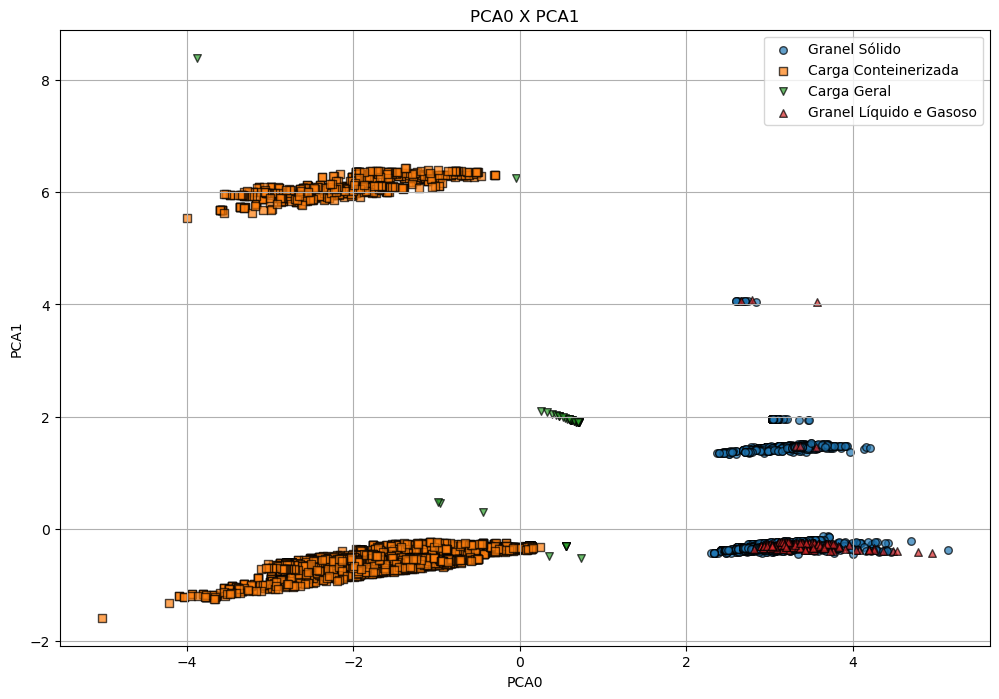

In [234]:
plt.figure(figsize=(12, 8))
plt.title("PCA0 X PCA1")
plt.xlabel("PCA0")
plt.ylabel("PCA1")
plt.grid(True)

# Plotar os dados
for x_, (cor, marker) in x_estilos.items():
    subset = df_proj[df_mestre[x_col] == x_]
    plt.scatter(subset['pca0'], subset['pca1'], marker=marker, color=cor, label=str(x_), alpha=0.7, edgecolor='k', s=30)

plt.legend()
plt.show()

Em teoria se eu tirar esses indicadores, isso ainda vai ser um padrão dos dados!